In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Source: https://archive.ics.uci.edu/ml/datasets/census+income

In [2]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', header=None, names = col_names)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.income.value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [5]:
df['native-country']

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: object

In [6]:
# Remove extra spacef rom beginning of country names
df['native-country'].str.split()

0        [United-States]
1        [United-States]
2        [United-States]
3        [United-States]
4                 [Cuba]
              ...       
32556    [United-States]
32557    [United-States]
32558    [United-States]
32559    [United-States]
32560    [United-States]
Name: native-country, Length: 32561, dtype: object

In [7]:
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
X = pd.get_dummies(df[feature_cols], drop_first = True)
y = np.where(df.income=='<=50K', 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size =0.20)

# Random Forest Classifier

In [10]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

print(f'Accuracy score for default random forest: {round(rfc.score(x_test, y_test)*100,3)}%')

Accuracy score for default random forest: 81.975%


## Tune model parameters

In [11]:
np.random.seed(0)

accuracy_train = []
accuracy_test = []

depths = range(1,26)

for i in depths:

    rfc = RandomForestClassifier(max_depth = i)
    rfc.fit(x_train, y_train)
    
    accuracy_train.append(accuracy_score(y_train, rfc.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test, rfc.predict(x_test)))


In [12]:
np.max(accuracy_test), depths[np.argmax(accuracy_test)]

(0.8346384154767388, 12)

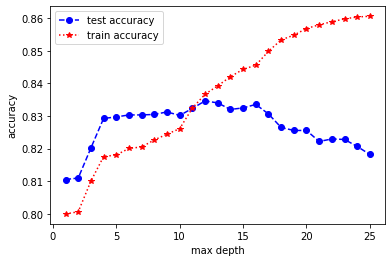

In [13]:
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [14]:
best_rfc = RandomForestClassifier(max_depth = 12)

best_rfc.fit(x_train, y_train)

best_rfc.score(x_test, y_test)

print(f'Accuracy score for default random forest: {round(best_rfc.score(x_test, y_test)*100,3)}%')

Accuracy score for default random forest: 83.402%


### Important features

In [15]:
feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rfc.feature_importances_), columns = ['feature', 'importance'])

In [16]:
# Top five important features
feature_imp_df.sort_values('importance', ascending = False).iloc[0:5]

,feature,importance
1,capital-gain,0.370119
0,age,0.248969
3,hours-per-week,0.140480
2,capital-loss,0.140439
4,sex_Male,0.078258


### Create additional features and retune


In [17]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [18]:
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels = ['HS or less', 'College to Bachelors', 'Masters or more'])

In [19]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']
#Use these two new additional features and recreate X and test/train split
X = pd.get_dummies(df[feature_cols], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

The highest accuracy on the test is achieved when depth: 12
The highest accuracy on the test set is: 84.984%


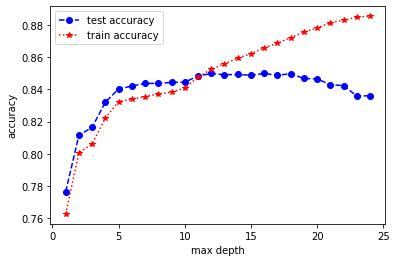

In [20]:
#Find the best max depth now with the additional two features
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,25)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved when depth: {best_depth}')
print(f'The highest accuracy on the test set is: {round(best_acc*100,3)}%')

plt.figure(2)
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [21]:
best_rfc = RandomForestClassifier(max_depth = best_depth)

best_rfc.fit(x_train, y_train)

best_rfc.score(x_test, y_test)

print(f'Accuracy score for default random forest: {round(best_rfc.score(x_test, y_test)*100,3)}%')

feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rfc.feature_importances_), columns = ['feature', 'importance'])

# Top five important features
feature_imp_df.sort_values('importance', ascending = False).iloc[0:5]

Accuracy score for default random forest: 84.984%


,feature,importance
1,capital-gain,0.314091
0,age,0.212266
3,hours-per-week,0.116084
10,education_bin_Masters or more,0.113096
2,capital-loss,0.102723
